# Option A - Data Challenge: Build a Banking Model - Preparation (2/3)
*Analytics for Financial Services - MBD02*
<br>
*Vilhelm Stiernstedt - 08/06/2018*


#### Section Description
In this section we will conduct all necessary data preparation such as:
1. null imputation
2. outlier treatment
3. feature engineering
4. write data

In [1]:
# import libraries
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

In [2]:
# import data
train = pd.read_csv('challengeTrain.csv')
test = pd.read_csv('challengeTest.csv')

# set index - customerID
train.set_index('customerID', inplace=True)
test.set_index('customerID', inplace=True)

# combine train and test
all_data = train.append(test)

/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [3]:
# pandas settings
pd.set_option('display.max_columns', 100)

# suspend matplotlib warnings
warnings.filterwarnings("ignore")

# plot settings
%matplotlib inline

In [4]:
### functions definitions
# function to convert crosstab count as % 
def percConvert(x):
  return round(x/float(x[-1]), 3)

## 1. Null Imputation
In the first round we will only employ a simple null imputation to be able to create a baseline model reuslt. This will include mean/median for numerical variables and 'unkown' for categorical features.

In [5]:
# NaN summary as % of all data
round(all_data.isnull().sum() / len(train), 3)

age                   0.058
channel               0.000
externalScore         0.021
indBadDebt            0.000
indBadLocation        0.000
indCreditBureau       0.000
indInternet           0.000
indSimin              0.000
indXlist              0.000
numLoans              0.652
numMortgages          0.652
previous              0.000
salary                0.000
sex                   0.000
status                0.000
sumExternalDefault    0.007
target                0.333
dtype: float64

In [6]:
# NaN summary absolute of all data
all_data.isnull().sum()

age                    30173
channel                    0
externalScore          11070
indBadDebt                 0
indBadLocation             0
indCreditBureau            0
indInternet                0
indSimin                   0
indXlist                   0
numLoans              340980
numMortgages          340980
previous                   0
salary                     0
sex                        0
status                     0
sumExternalDefault      3554
target                174313
dtype: int64

### missingno matrix

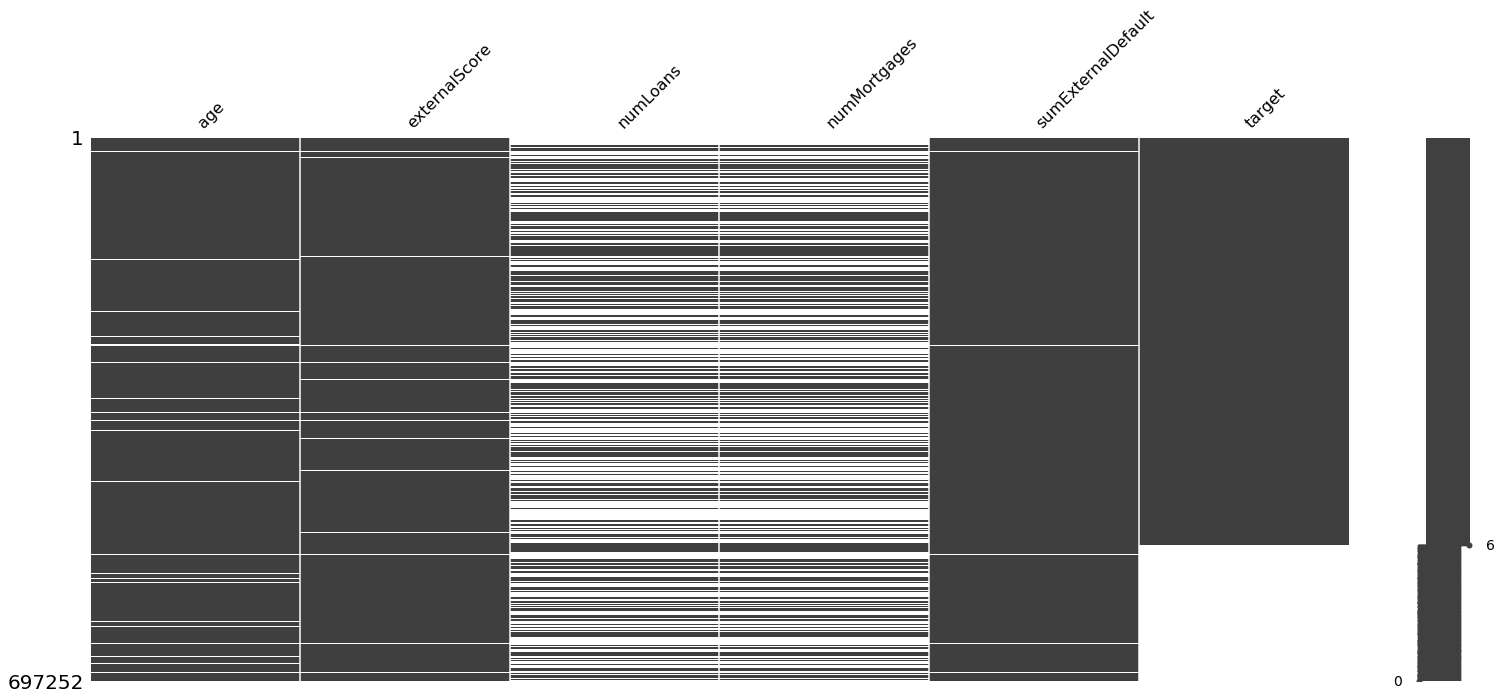

In [7]:
# nullity matrix to visualize structure of missing data
nan_cols = all_data.columns[all_data.isnull().any()].tolist()
msno.matrix(all_data[nan_cols]);

**Notes**
<br>
1. numLoans and numMortages seems to match up pretty good. 
2. other features - no clear structure between missing data features. Perhaps missing data are Missing at Random (MAR).

### Nullity Correlation

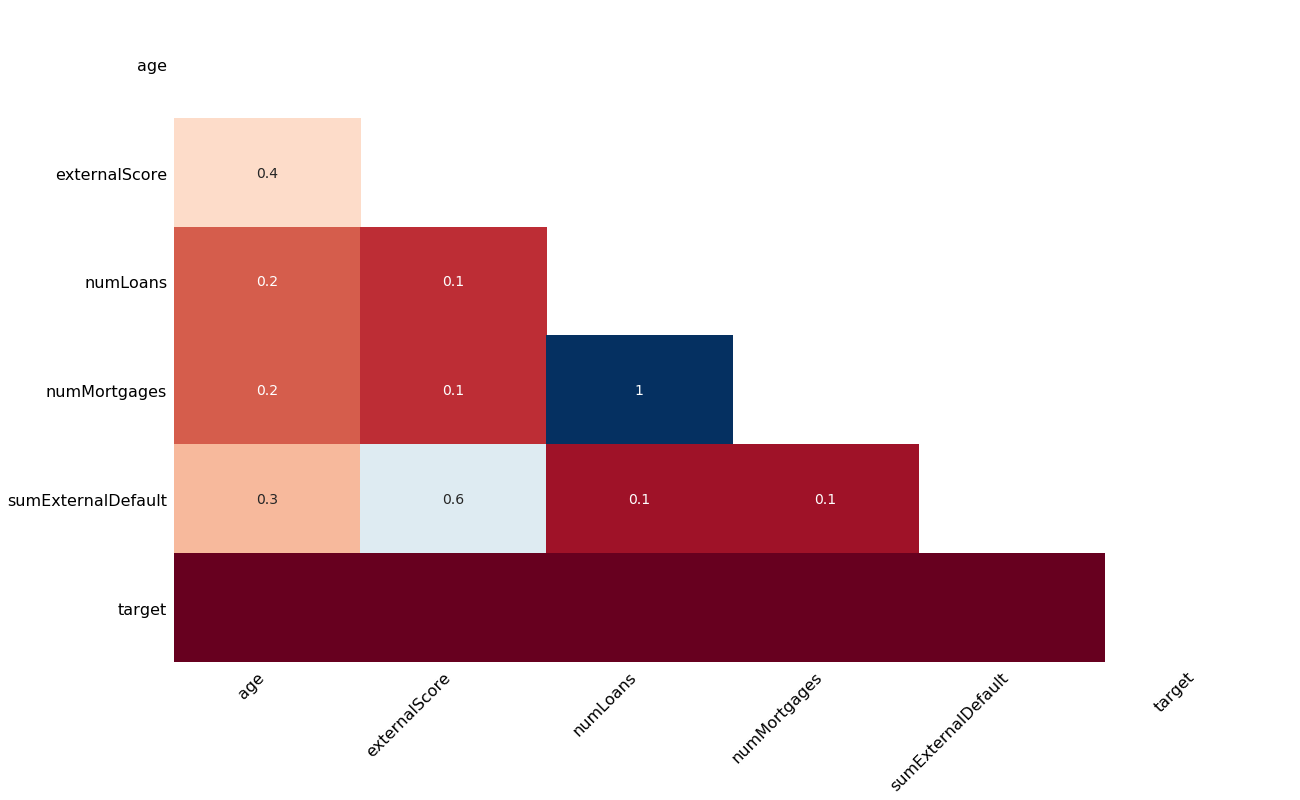

In [8]:
# correlation heatmap -> better find nullity relationship null features
msno.heatmap(all_data[nan_cols]);

**Notes**
<br>
1. sumExternalDefault and externalScore have 0.6 correlation between their missing data points.
2. numLoans and numMortgages are perfectly correlated, that is, all data points where numLoans are missing numMortages will also be missing.  

### age
Given age has around 6% missing values of all data. We should try to find a good way to impute these values.
- groupby based on correlated values (median)
    - median age of 'externalScore', 'indSimin'
    - median age of 'indSimin'
    - median age of total

#### groupby

In [11]:
# groupby -> seems to hold some rationale
all_data.groupby(['externalScore', 'indSimin']).age.median()

externalScore  indSimin
1.0            0           30.0
2.0            0           29.0
               1           29.0
3.0            0           31.5
               1           32.0
4.0            0           31.0
               1           31.0
5.0            0           31.0
               1           33.0
6.0            0           31.0
               1           31.0
7.0            0           30.0
               1           34.0
8.0            0           31.0
               1           35.5
9.0            0           32.0
               1           31.0
10.0           0           31.0
               1           30.5
11.0           0           31.0
               1           32.0
12.0           0           31.0
               1           32.0
13.0           0           31.0
               1           32.5
14.0           0           30.0
               1           33.0
15.0           0           32.0
               1           32.0
16.0           0           31.0
                

In [12]:
# groupby -> seems to hold some rationale
all_data.groupby(['externalScore']).age.median()

externalScore
1.0      30.0
2.0      29.0
3.0      32.0
4.0      31.0
5.0      32.0
6.0      31.0
7.0      31.0
8.0      32.0
9.0      32.0
10.0     31.0
11.0     31.0
12.0     31.0
13.0     31.0
14.0     30.0
15.0     32.0
16.0     31.0
17.0     31.0
18.0     31.0
19.0     32.0
20.0     32.0
21.0     32.0
22.0     32.0
23.0     32.0
24.0     33.0
25.0     32.0
26.0     32.0
27.0     33.0
28.0     33.0
29.0     33.0
30.0     33.0
         ... 
966.0    54.0
967.0    55.0
968.0    54.0
969.0    55.0
970.0    56.0
971.0    55.0
972.0    56.0
973.0    55.0
974.0    56.0
975.0    56.0
976.0    56.0
977.0    56.0
978.0    58.0
979.0    59.0
980.0    59.0
981.0    59.0
982.0    58.0
983.0    57.0
984.0    58.0
985.0    60.0
986.0    61.0
987.0    62.0
988.0    62.0
989.0    62.0
990.0    60.0
991.0    64.0
992.0    61.0
993.0    64.0
994.0    63.0
995.0    65.0
Name: age, Length: 995, dtype: float64

In [9]:
# groupby -> seems to hold some rationale
all_data.groupby(['indSimin']).age.median()

indSimin
0    36.0
1    47.0
Name: age, dtype: float64

#### imputation

In [10]:
# count NaNs
all_data.age.isnull().sum()

30173

In [13]:
# impute NaNs groupby medians
# groupby list
grpby_list = ['externalScore', 'indSimin']

# fill NaN
all_data.age.fillna(all_data.groupby(grpby_list).age.transform('median'), inplace=True)

In [14]:
# count NaNs -> 23K gone
all_data.age.isnull().sum()

7608

In [17]:
# impute NaNs groupby medians
# groupby list
grpby_list = ['indSimin']

# fill NaN
all_data.age.fillna(all_data.groupby(grpby_list).age.transform('median'), inplace=True)

In [18]:
# count NaNs -> all gone!
all_data.age.isnull().sum()

0

No handles with labels found to put in legend.


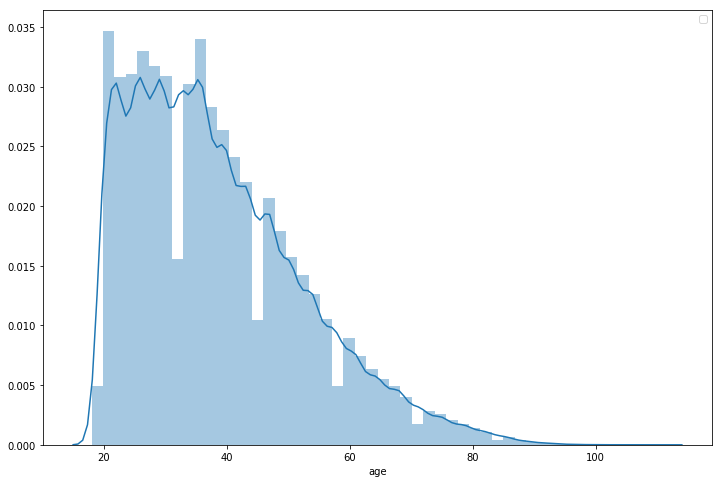

In [19]:
# histogram with age -> similar as before, small hikes around 20 and 35. -> ok imputation for now!
fig, ax = plt.subplots(figsize=(12, 8))

sns.distplot(all_data.age)

plt.legend();

### externalScore
externalScore seems to be highly related with the liklihood of having outstanding cc fees. The 2.1% of missing values is therefore a setback for our modelling. Thus, we should try to get impute it in the most efficient way rather than simply remove these rows. Let's try to see if we can bin the externalScores and see if they're distingushable based on our other features. If this is the case, perhaps we can build a model and predict what bin they belong to, alternatively use a regression.

- Groupby - get average scores for profile

#### Groupby
Find average externalScore based on correlated features. Since we will use bins, we don't need exact figure. Hopefully on the right side of the bin cut points. Median should find 'true' center better than mean. Some NaNs still available, maybe we can narrow the groupby list down until all NaN have been imputed.

In [20]:
# groupby to capture the general idea. 
all_data.groupby(['age', 'indBadDebt','sumExternalDefault']).externalScore.median()

age    indBadDebt  sumExternalDefault
18.0   0           0.00                  586.0
       1           21.78                 325.0
                   24.55                 123.0
                   25.00                 447.0
                   83.29                 226.0
                   164.69                484.0
                   193.44                384.0
                   233.80                287.0
                   259.53                237.0
                   267.55                371.0
                   282.76                  NaN
                   296.00                371.0
                   312.47                291.0
                   333.86                443.0
                   434.96                516.0
                   499.93                 46.0
                   519.62                431.0
                   528.63                585.0
                   565.94                178.0
                   575.71                 87.0
                   729

In [24]:
# groupby -> seems to hold some rationale
all_data.groupby(['age']).externalScore.median()

age
18.0     586.0
19.0     546.0
20.0     663.0
21.0     521.0
22.0     525.0
23.0     529.0
24.0     533.0
25.0     538.0
26.0     544.0
27.0     581.0
27.5     447.0
28.0     562.0
29.0     574.0
29.5     352.0
30.0     569.0
30.5     330.5
31.0     587.0
31.5     290.5
32.0     596.0
32.5     522.0
33.0     607.0
33.5     464.0
34.0     615.0
34.5     607.0
35.0     621.0
35.5     374.0
36.0     628.0
37.0     643.0
38.0     649.0
39.0     661.0
         ...  
81.0     855.0
82.0     855.0
83.0     851.0
84.0     854.5
85.0     845.0
86.0     855.0
87.0     845.0
88.0     831.0
89.0     852.0
90.0     854.5
91.0     840.0
92.0     855.0
93.0     849.0
94.0     855.0
95.0     829.0
96.0     806.5
97.0     839.0
98.0     835.0
99.0     838.0
100.0    831.5
101.0    837.0
102.0    906.5
103.0    939.0
104.0    906.5
105.0    747.0
106.0    747.0
107.0      NaN
108.0    805.0
110.0      NaN
111.0      NaN
Name: externalScore, Length: 105, dtype: float64

#### Imputation

In [25]:
# impute NaNs groupby medians
# groupby list
grpby_list = ['age', 'indBadDebt', 'sumExternalDefault']

# fill NaN
all_data.externalScore.fillna(all_data.groupby(grpby_list).externalScore.transform('median'), inplace=True)

In [26]:
# count NaNs again
all_data.externalScore.isnull().sum()

3985

In [29]:
# impute NaNs groupby medians
# groupby list
grpby_list = ['age', 'indBadDebt']

# fill NaN
all_data.externalScore.fillna(all_data.groupby(grpby_list).externalScore.transform('median'), inplace=True)

In [30]:
# count NaNs again
all_data.externalScore.isnull().sum()

4

In [33]:
# fill NaN with current median
all_data.externalScore.fillna(all_data.externalScore.median(), inplace=True)

In [34]:
# count NaNs again -> all done!
all_data.externalScore.isnull().sum()

0

#### Distrubution

No handles with labels found to put in legend.


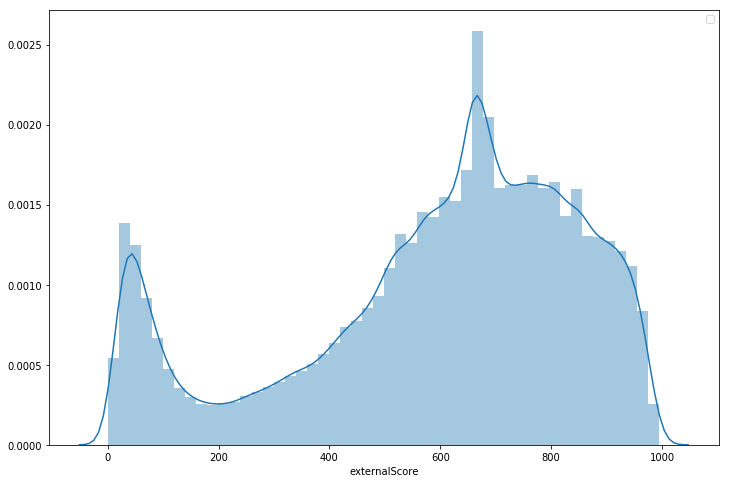

In [35]:
# histogram with age -> similar as before -> ok imputation for now!
fig, ax = plt.subplots(figsize=(12, 8))

sns.distplot(all_data.externalScore)

plt.legend();

### sumExternalDefault

In [36]:
# groupby to capture the general idea. 
all_data.groupby(['age', 'indBadDebt', 'indCreditBureau', 'indSimin']).sumExternalDefault.median()

age    indBadDebt  indCreditBureau  indSimin
18.0   0           0                0              0.000
                                    1              0.000
       1           0                0            304.235
                                    1             24.550
19.0   0           0                0              0.000
                                    1              0.000
       1           0                0            268.140
                                    1            671.590
                   1                0            213.570
20.0   0           0                0              0.000
                                    1              0.000
                   1                0              0.000
       1           0                0            162.205
                                    1            209.160
                   1                0           1259.750
                                    1            568.340
21.0   0           0                0      

#### Imputation

In [37]:
# impute NaNs groupby medians
# groupby list
grpby_list = ['age', 'indBadDebt', 'indCreditBureau', 'indSimin']

# fill NaN
all_data.sumExternalDefault.fillna(all_data.groupby(grpby_list).sumExternalDefault.transform('median'), inplace=True)

In [38]:
# count NaNs again -> all done!
all_data.sumExternalDefault.isnull().sum()

0

#### Distrubution

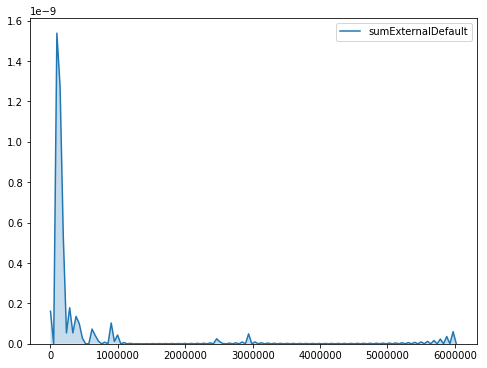

In [39]:
# KDEplot to see distrubution - -> similar as before -> ok imputation for now!
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(all_data['sumExternalDefault'], shade=True);

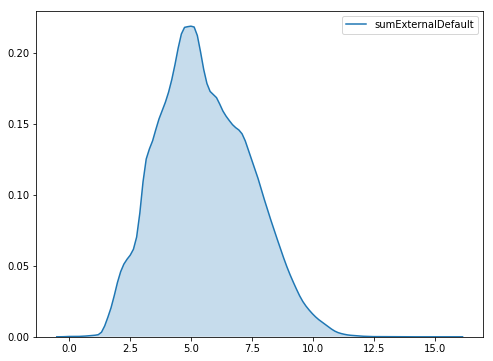

In [40]:
# KDEplot to see distrubution - log -> also similar as before -> ok imputation for now!
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(np.log(all_data['sumExternalDefault']), shade=True);

### categorical variables -> 'unknown' imputation
We will use -1 for all unknown imputations for loans and mortgages to keep numerical scale.

#### numLoans

In [41]:
# fill NaNs with mean 
all_data.numLoans.fillna(-1, inplace=True)

#### numMortgages

In [42]:
# fill NaNs with mean 
all_data.numMortgages.fillna(-1, inplace=True)

### Summary

In [43]:
all_data.isnull().sum()

age                        0
channel                    0
externalScore              0
indBadDebt                 0
indBadLocation             0
indCreditBureau            0
indInternet                0
indSimin                   0
indXlist                   0
numLoans                   0
numMortgages               0
previous                   0
salary                     0
sex                        0
status                     0
sumExternalDefault         0
target                174313
dtype: int64

## 2. Outlier Treatment

### age
from our analysis we saw that the oldest customer were 111 years old. In the test set we had oldest age 108. Lets clearify if this is an outlier or if we have an continous age incrementation.

In [44]:
# lets see the top 20 oldest customers
train.age.nlargest(20)

customerID
D_00019965080    111.0
D_00029362229    110.0
D_00029269834    107.0
D_00000912941    107.0
D_00003568903    106.0
D_00006062192    106.0
D_00002616158    106.0
D_00025609059    105.0
D_00000403809    105.0
D_00030483665    105.0
D_00007519037    104.0
D_00029652136    104.0
D_00002773851    103.0
D_00029279566    103.0
D_00023868279    102.0
D_00010203223    102.0
D_00002386212    101.0
D_00000030015    100.0
D_00029240100    100.0
D_00010297296     99.0
Name: age, dtype: float64

#### Notes
We have a nice spread of quite old customers. Let's assume no outliers. We will most likely employ age binning for the final model and thus don't need to smooth out the distrubution manually.

### numLoans
From our analysis we saw that one customer had 14 loans. Let's see if this might be an outlier or some data entry error.

In [45]:
# lets see the top 20 number of loans
train.numLoans.nlargest(20)

customerID
D_00006996840    14.0
D_00041612651     9.0
D_00008855929     9.0
D_00008140321     9.0
D_00006217738     9.0
D_00042869990     9.0
R_10072716359     9.0
D_00019914273     9.0
D_00017841280     9.0
D_00009940914     9.0
D_00042757450     8.0
D_00009788991     8.0
D_00010283824     8.0
D_00032734256     8.0
D_00003893932     8.0
D_00042263278     8.0
D_00007300158     8.0
D_00017807380     8.0
D_00080240146     8.0
D_00017820875     8.0
Name: numLoans, dtype: float64

In [46]:
# lets see the details of the customer with 14 loans
train[train.numLoans > 10]

,sex,status,age,externalScore,indSimin,indXlist,indCreditBureau,indInternet,indBadDebt,salary,numLoans,numMortgages,channel,indBadLocation,previous,sumExternalDefault,target
customerID,,,,,,,,,,,,,,,,,
D_00006996840,Female,Single,50.0,115.0,0,0,0,1,1,"[2000,3000)",14.0,0.0,External Agent,0,Normal,1370.0,1


#### Notes
14 loan induvidual have
- low external risk score
- debt classified as lower qualty risk
- has ooutstanding cc fees
- just above average salary

In [47]:
# lets get the generic profile (mean) values for high number of loans
train[train.numLoans > 7].groupby(['numLoans', 'salary']).median()

age  externalScore  indSimin  indXlist  \
numLoans salary                                                 
8.0      >8000        42.0          728.0       0.0       0.0   
         [1300,1500)  47.0          544.0       0.0       0.0   
         [1500,2000)  31.0           96.5       0.0       0.0   
         [2000,3000)  38.0          327.5       0.0       0.0   
         [3000,5000)  51.0          660.0       0.0       0.0   
         [5000,8000)  52.0          827.0       0.0       0.0   
9.0      >8000        62.0          911.0       0.0       0.0   
         [1000,1300)  28.0           11.0       0.0       0.0   
         [1300,1500)  53.0          409.0       0.0       0.0   
         [1500,2000)  47.0          475.0       0.0       0.0   
         [2000,3000)  46.5          490.0       0.5       0.0   
         [3000,5000)  43.0          393.0       0.0       0.0   
14.0     [2000,3000)  50.0          115.0       0.0       0.0   

                      indCreditBureau  indInternet  indBadDebt  numMortgages  \
numLoans salary                                                                
8.0      >8000                    0.0          1.0         0.0           0.0   
         [1300,1500)              0.0          1.0         0.0           0.0   
         [1500,2000)              0.0          1.0         1.0           0.0   
         [2000,3000)              0.0          1.0         0.0           0.0   
         [3000,5000)              0.0          1.0         1.0           0.0   
         [5000,8000)              0.0          1.0         0.0           0.0   
9.0      >8000                    0.0          1.0         0.0           1.0   
         [1000,1300)              0.0          1.0         1.0           0.0   
         [1300,1500)              0.0          1.0         1.0           0.0   
         [1500,2000)              0.0          1.0         1.0           0.0   
         [2000,3000)              0.0          1.0         0.5           0.0   
         [3000,5000)              0.0          1.0         1.0           0.0   
14.0     [2000,3000)              0.0          1.0         1.0           0.0   

                      indBadLocation  sumExternalDefault  target  
numLoans salary                                                   
8.0      >8000                   0.0               0.000     0.0  
         [1300,1500)             0.0               0.000     0.0  
         [1500,2000)             0.0             377.160     0.0  
         [2000,3000)             0.0               0.000     0.0  
         [3000,5000)             0.0             163.000     0.0  
         [5000,8000)             0.0               0.000     0.0  
9.0      >8000                   0.0               0.000     0.0  
         [1000,1300)             0.0            3080.100     1.0  
         [1300,1500)             0.0             172.650     0.0  
         [1500,2000)             0.0             145.280     0.0  
         [2000,3000)             0.0             188.325     0.0  
         [3000,5000)             0.0           12804.380     0.0  
14.0     [2000,3000)             0.0            1370.000     1.0

#### Notes
We see a tendency that induviudals with a low externalScore genereally have a lower salary contra induviduals with high salary. They're allowed to barrow money as they probably have holds some other form of assets to lower risks.

#### Conclusion
It may be that this induvidual acctualy holds 14 loans. However, we will remove it to see if our models generalize better.

In [48]:
# drop row with 14 loans based on index value, customer id
all_data.drop('D_00006996840', inplace=True)

### numMortgages
From our analysis we saw that we had very few induviduals with 3 mortgages. Lets investigate and perhaps remove if unrepresentable.

In [49]:
train[train.numMortgages > 2]

,sex,status,age,externalScore,indSimin,indXlist,indCreditBureau,indInternet,indBadDebt,salary,numLoans,numMortgages,channel,indBadLocation,previous,sumExternalDefault,target
customerID,,,,,,,,,,,,,,,,,
D_00027286234,Male,Married,40.0,343.0,0,0,0,1,0,"[5000,8000)",4.0,3.0,External Agent,0,Restructuring,0.00,0
D_00010432810,Female,Single,53.0,20.0,0,0,0,1,1,"[3000,5000)",4.0,3.0,Call Center,0,Normal,13927.20,0
D_00010299901,Male,Single,39.0,728.0,0,0,0,1,0,>8000,2.0,3.0,Recovery,0,Normal,0.00,0
R_10097885732,Male,Single,42.0,762.0,1,0,0,1,0,"[5000,8000)",3.0,3.0,Call Center,0,Normal,0.00,0
D_00032962550,Male,Single,39.0,698.0,0,0,0,1,0,>8000,3.0,3.0,Branch,1,Normal,0.00,0
D_00017936657,Male,Married,68.0,959.0,1,0,0,1,0,"[5000,8000)",1.0,3.0,Branch,0,Restructuring,0.00,0
D_00009716008,Female,Married,44.0,46.0,0,0,1,1,1,"[5000,8000)",3.0,3.0,Recovery,0,Restructuring,4197.76,0
D_00007635269,Male,Single,38.0,840.0,0,0,0,1,0,"[5000,8000)",3.0,3.0,Recovery,0,Normal,0.00,1
D_00008203160,Male,Divorced,52.0,785.0,0,0,0,0,1,>8000,4.0,3.0,Online,0,Refinancing,339.17,1


#### Notes
High salary earners with varied credit scores. Perhaps multiple houses and banks limit goes at 3 mortgages and thus we don't see any higher number.

## 3. Feature Engineering

### Ordinal Transformation

- salary: convert to ordinal


In [50]:
# recalssify salary levels to ordinal scale
salary_table = {'None': 0,
               '<650': 1,
               '[650,1000)': 2,
               '[1000,1300)': 3,
               '[1300,1500)': 4,
               '[1500,2000)': 5,
               '[2000,3000)': 6,
               '[3000,5000)': 7,
               '[5000,8000)': 8,
               '>8000': 9}

all_data['salary_ordinal'] = all_data.salary.replace(salary_table)

### Level reduction of Categorical Features

- status: merge widower with married (similar target proportions, similar life conditions) and Divorced as we have too little data.
- salary_ordinal: shrink to 5 levels based on analysis of similar target proportions.
- channel: merge recovery with unknown, similar target proportions, unknown too little data.


In [51]:
# status
status_table = {'Widower': 'Once_Married',
                'Divorced': 'Once_Married',
                'Married': 'Once_Married'}

all_data['status_new'] = all_data.status
all_data['status_new'] = all_data.status.replace(status_table)

# salary
salary_table = {1: 0, 2: 0, 3: 1, 4: 2, 5: 2, 6: 3, 7: 3, 8: 4, 9: 4}
all_data['salary_ord_shrink'] = all_data.salary_ordinal
all_data['salary_ord_shrink'] = all_data.salary_ordinal.replace(salary_table)

# channel
channel_table = {'Recovery': 'Recovery_Unknown',
                 'Unknown': 'Recovery_Unknown'}
all_data['channel_new'] = all_data.channel
all_data['channel_new'] = all_data.channel.replace(channel_table)

### Binning

- age: quartiles
- numLoans: bin to shrink number of levels, bin groups have similar target propotions.
- numMortgages_binary: binary bins, mortgage or no mortgage, based on similar idea that any number of mortgages have significant lower risk of outstanding cc fees compared to not having one.
- sumExternalDefault:
    - arbitary binning, group scores that have similar target proportions. 
    - binary binning, no external deafult or not, might be perferred by simplier models.
- externalScore: modified 8 qurtile binning to form distinctive groups.

In [52]:
# binning defintions
# age - qurtile binning
all_data['age_qbin'] = pd.qcut(all_data.age, 4, precision=0)

# numLoans - define arbitary bins
all_data['numLoans_bins'] = pd.cut(all_data.numLoans,
                                   [-1, 0, 1, 2, 3, 5, 100], right=False)

# numMortgage - define binary bin
all_data['numMortgages_bins'] = pd.cut(all_data.numMortgages,
                                         [-1, 0, 1, 100], right=False)

# sumExternalDeafault -> lets see what binning is favoured by models
# arbitary bins
all_data['sumExternalDefault_arbbin'] = pd.cut(all_data.sumExternalDefault,
                                            [0, 1, 100, 250, 500, 100000000],
                                            right=False) 
# binary bins
all_data['sumExternalDefault_binarybin'] = pd.cut(all_data.sumExternalDefault,
                                            [0, 1, 100000000], right=False) 

# externalScore - arbitary binning based on 8 qurtile binning
all_data['externalScore_arbbin'] = pd.cut(all_data.externalScore,
                                       [0, 182, 458, 649, 872, 1000],
                                       right=False)

### New Features

- customerID_class: split of first characters of customerID (our index) -> R / D / DR
- sameID_diff_extScore: 1 for all duplicate customersID that have significant different externalScore. All others 0.

In [53]:
# new features execution

### customerID_class R/D/DR - split index by _
all_data['customerID_class'] = all_data.index.str.split('_').str.get(0)

### duplicate_acounts -> duplicated ids = 1
all_data['multi_accoutns'] = 0
all_data['multi_accoutns'].loc[all_data.index.get_duplicates()] = 1

### sameID_diff_extScore - find ids where max extScore is 100> than mean for all accounts 
# function that will compare duplicate ids and assess if externalScore is very different
# empyt list to add ids
flagged_ids_extScore = []

# loop over all duplicated ids and flag ids in new feature
for id in train.index.get_duplicates():
    # if target is not same over all accounts append to list
    if abs(train.loc[id].externalScore.max() - train.loc[id].externalScore.mean()) > 100:
        flagged_ids_extScore.append(id)

# create new feature and input 1 for indicies in list  
all_data['sameID_diff_extScore'] = 0
all_data['sameID_diff_extScore'].loc[flagged_ids_extScore] = 1

### binary features
# numLoans known = 1 / unknown = 0
all_data['numLoans_known'] = np.where(all_data['numLoans']>=0, 1, 0)
# numMortgage known = 1 / unknown = 0
all_data['numMortgages_known'] = np.where(all_data['numMortgages']>=0, 1, 0)
# status known = 1 / unknown = 0
all_data['status_known'] = np.where(all_data['status']=='Unknown', 0, 1)
# channel known = 1 / unknown = 0
all_data['channel_known'] = np.where(all_data['channel']=='Unknown', 0, 1)
# salary known = 1 / unknown = 0
all_data['salary_known'] = np.where(all_data['salary']=='Unknown', 0, 1)

### Transformations

In [54]:
# externalScore - log / sqrt / square / cube
all_data['externalScore_log'] = np.log(all_data.externalScore)
all_data['externalScore_sqrt'] = np.sqrt(all_data.externalScore)
all_data['externalScore**2'] = (all_data.externalScore)**2
all_data['externalScore**3'] = (all_data.externalScore)**3

# sumExternalDeafult
all_data['sumExternalDefault_log'] = np.log1p(all_data.sumExternalDefault)+1
all_data['sumExternalDefault_sqrt'] = np.sqrt(all_data.sumExternalDefault)
all_data['sumExternalDefault**2'] = (all_data.sumExternalDefault)**2
all_data['sumExternalDefault**3'] = (all_data.sumExternalDefault)**3

## 4. Drop Feautres

In [55]:
# given loan and mortgage missing more than 60% -> we drop all but binary known or not_known
var_drop = ['numLoans', 'numMortgages', 'numLoans_bins', 'numMortgages_bins']
# drop unwanted features
all_data.drop(var_drop, axis=1, inplace=True)

## 5. Split Data 

In [56]:
# view columns -> all looks good
all_data.head()

,age,channel,externalScore,indBadDebt,indBadLocation,indCreditBureau,indInternet,indSimin,indXlist,previous,salary,sex,status,sumExternalDefault,target,salary_ordinal,status_new,salary_ord_shrink,channel_new,age_qbin,sumExternalDefault_arbbin,sumExternalDefault_binarybin,externalScore_arbbin,customerID_class,multi_accoutns,sameID_diff_extScore,numLoans_known,numMortgages_known,status_known,channel_known,salary_known,externalScore_log,externalScore_sqrt,externalScore**2,externalScore**3,sumExternalDefault_log,sumExternalDefault_sqrt,sumExternalDefault**2,sumExternalDefault**3
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
D_00046780637,23.0,External Agent,373.0,1,0,0,1,0,0,Normal,"[1000,1300)",Female,Single,1173.46,1.0,3,Single,1,External Agent,"(17.0, 27.0]","[500, 100000000)","[1, 100000000)","[182, 458)",D,0,0,0,0,1,1,1,5.921578,19.313208,139129.0,51895117.0,8.068564,34.255802,1.377008e+06,1.615864e+09
D_00043828980,27.0,External Agent,702.0,0,0,0,1,1,0,Restructuring,"[1500,2000)",Male,Single,0.00,0.0,5,Single,2,External Agent,"(17.0, 27.0]","[0, 1)","[0, 1)","[649, 872)",D,0,0,1,1,1,1,1,6.553933,26.495283,492804.0,345948408.0,1.000000,0.000000,0.000000e+00,0.000000e+00
D_00043396577,28.0,External Agent,728.0,0,0,0,1,0,0,Restructuring,"[1500,2000)",Male,Single,0.00,1.0,5,Single,2,External Agent,"(27.0, 36.0]","[0, 1)","[0, 1)","[649, 872)",D,0,0,1,1,1,1,1,6.590301,26.981475,529984.0,385828352.0,1.000000,0.000000,0.000000e+00,0.000000e+00
D_00006768677,45.0,Call Center,650.0,0,0,0,0,0,0,Unpaid,"[1000,1300)",Male,Single,0.00,1.0,3,Single,1,Call Center,"(36.0, 47.0]","[0, 1)","[0, 1)","[649, 872)",D,0,0,1,1,1,1,1,6.476972,25.495098,422500.0,274625000.0,1.000000,0.000000,0.000000e+00,0.000000e+00
D_00062632001,31.0,External Agent,625.0,0,0,0,1,0,0,Normal,"[650,1000)",Female,Unknown,0.00,0.0,2,Unknown,0,External Agent,"(27.0, 36.0]","[0, 1)","[0, 1)","[458, 649)",D,0,0,0,0,0,1,1,6.437752,25.000000,390625.0,244140625.0,1.000000,0.000000,0.000000e+00,0.000000e+00


In [57]:
# split data back to train and test 
train = all_data[all_data.target.notnull()]
test = all_data[all_data.target.isnull()]
# drop target from testset
test.drop('target', axis=1, inplace=True)

In [58]:
# write cleaned, imputed, extended data
train.to_csv('train_clean.csv')
test.to_csv('test_clean.csv')